<a href="https://colab.research.google.com/github/AugustvonMackensen/AI_colab/blob/main/ML_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1] import the packages

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, Flatten, Reshape
from keras.datasets import mnist
from keras.models import Model

[2] Prepare the Data and Normalization

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

[3] Define the Model Class

In [3]:
input_dim = 784
latent_dim = 64

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
      Flatten(),
      Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      Dense(input_dim, activation='sigmoid'),
      Reshape((28, 28))
    ])

  def call(self, input_data):
    encoded_data = self.encoder(input_data)
    encoded_data = self.decoder(encoded_data)
    return encoded_data

[4] Fit

In [4]:
autoencoder = Autoencoder(latent_dim)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(x_train, x_train, epochs=50,batch_size=256,
                shuffle=True,validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 10s 16ms/step - loss: 0.0601 - val_loss: 0.0329
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0266 - val_loss: 0.0211
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0183 - val_loss: 0.0153
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0138 - val_loss: 0.0118
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0108 - val_loss: 0.0094
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0088 - val_loss: 0.0078
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0074 - val_loss: 0.0067
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0064 - val_loss: 0.0059
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0058 - val_loss: 0.0054
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0054 - val_loss: 0.00

[5] Apply to images

In [5]:
encoded_imgs = autoencoder.encoder(x_test)
decoded_imgs = autoencoder.decoder(encoded_imgs)

[6] check

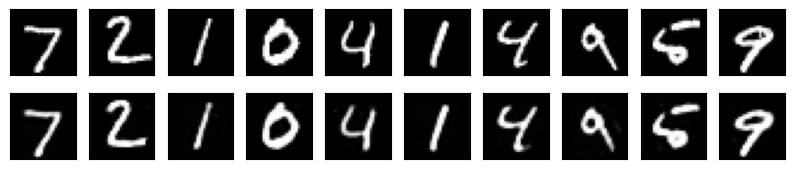

In [6]:
n = 10
plt.figure(figsize=(10, 2))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()